# Analise exploratoria dos dados do consumidor.gov de maio de 2021


In [ ]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Biblioteca para trabalhar com mapas:
!pip install folium

In [ ]:
# Carregando a base de dados:
dataset = pd.read_csv('./base/basecompleta2021-05.csv',sep=';')

FileNotFoundError: ignored

In [ ]:
# Visualizando as 5 primeiras linhas do Dataframe:
# Cada linha da base de dados corresponde a uma reclamação feita pelo consumidor.
dataset.head().T

,0,1,2,3,4
Gestor,Instituto Estadual de Proteção e Defesa do Con...,Secretaria Nacional do Consumidor,Secretaria Nacional do Consumidor,Programa Estadual de Proteção e Defesa do Cons...,Secretaria Nacional do Consumidor
Canal de Origem,Plataforma Web,Plataforma Web,Plataforma Web,Plataforma Web,Plataforma Web
Região,SE,NE,N,NE,S
UF,ES,MA,AM,CE,RS
Cidade,Vitória,Vitorino Freire,Manaus,Pacatuba,Caxias do Sul
Sexo,M,F,M,M,F
Faixa Etária,entre 31 a 40 anos,entre 31 a 40 anos,entre 31 a 40 anos,entre 21 a 30 anos,entre 51 a 60 anos
Ano Abertura,2021,2021,2021,2021,2021
Mês Abertura,3,3,3,3,3
Data Abertura,11/03/2021,12/03/2021,13/03/2021,14/03/2021,15/03/2021


#Qual o numero de reclamações por Estado?

In [ ]:
# Agrupdando por UF, selecionando somente a coluna UF
dataset.groupby('UF')['UF'].count()

UF
AC      418
AL     1089
AM     1559
AP      167
BA     7492
CE     3274
DF     4961
ES     2927
GO     4553
MA     3415
MG    13881
MS     3721
MT     2396
PA     1733
PB     1349
PE     3449
PI     1540
PR    10569
RJ    10960
RN     1005
RO      525
RR      177
RS     7923
SC     5269
SE      695
SP    30328
TO      747
Name: UF, dtype: int64

In [ ]:
# Com base no agrupamento crio uma nova coluna somente para pegar a lista de UF
listaUfGroup = dataset.groupby('UF')['UF'].apply(list).reset_index(name='new')['UF']

NameError: ignored

In [ ]:
# Monto um novo dataframe com duas colunas, a primeira UF e a segunda Quantidade
dataFrameReclamacaoPorEstado = pd.DataFrame(data={'UF':listaUfGroup, 'Quantidade': dataset.groupby('UF')['UF'].count().tolist()})
dataFrameReclamacaoPorEstado = dataFrameReclamacaoPorEstado.sort_values(by=['Quantidade'])

NameError: ignored

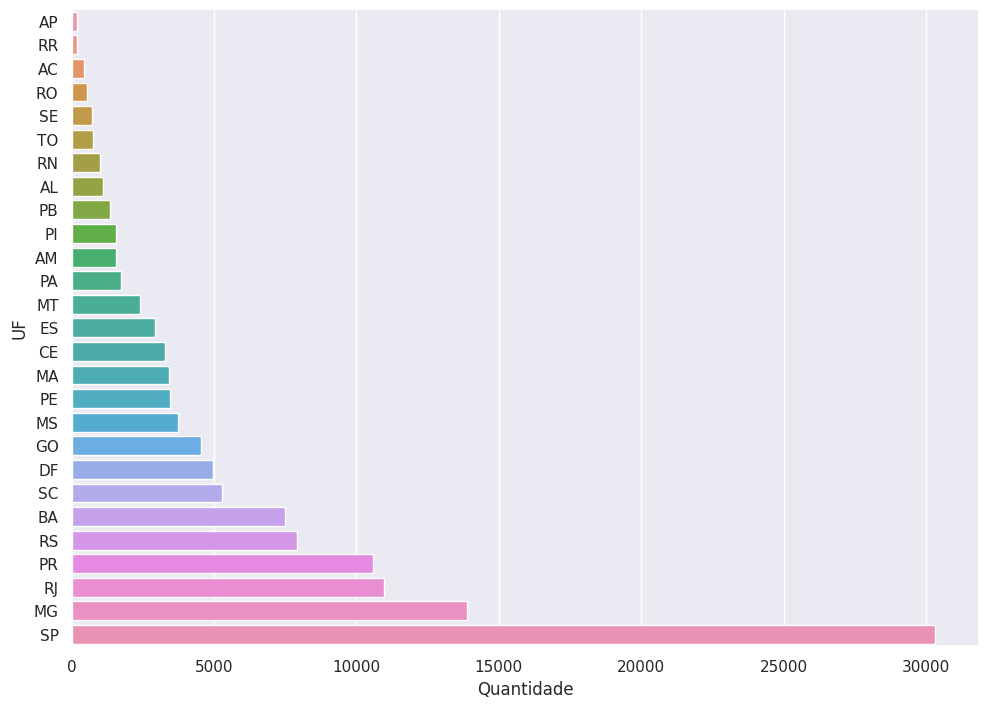

In [ ]:
#Visulização em grafico
sns.set(style="darkgrid")
uf = dataFrameReclamacaoPorEstado.get('UF')
count = dataFrameReclamacaoPorEstado.get('Quantidade')

#aumentando as dimensões do grafico
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.barplot(x=count,y=uf,data=dataFrameReclamacaoPorEstado, orient='h')


# Quantidade de reclamações por sexo?


In [ ]:
def removerColunaOndeValorForNaN(column_name):
    dataset.dropna(subset=[column_name], inplace=True)

In [ ]:
removerColunaOndeValorForNaN('Sexo')

In [ ]:
#Visualização em formato numerica
dataset[u'Sexo'].value_counts()

M    70177
F    55889
O       56
Name: Sexo, dtype: int64

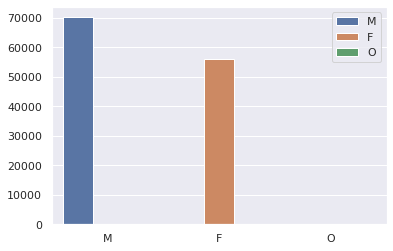

In [ ]:
#Visualização em grafico
sns.set(style="darkgrid")
sexo = dataset['Sexo'].unique()
cont = dataset['Sexo'].value_counts().tolist()
sns.barplot(x=sexo,y=cont,hue=sexo)

# Faixa etária de consumidores por sexo

In [ ]:
dataset.groupby('Sexo')[u'Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos    15313
      entre 21 a 30 anos    12508
      entre 41 a 50 anos     9113
      entre 51 a 60 anos     7809
      entre 61 a 70 anos     7079
      mais de 70 anos        3231
      até 20 anos             836
M     entre 31 a 40 anos    23751
      entre 21 a 30 anos    17239
      entre 41 a 50 anos    12324
      entre 51 a 60 anos     6766
      entre 61 a 70 anos     6049
      mais de 70 anos        2868
      até 20 anos            1180
O     entre 31 a 40 anos       18
      entre 21 a 30 anos       17
      até 20 anos               7
      entre 61 a 70 anos        6
      entre 41 a 50 anos        4
      entre 51 a 60 anos        3
      mais de 70 anos           1
Name: Faixa Etária, dtype: int64


# Consumidores mais jovens contratam serviços pela internet?

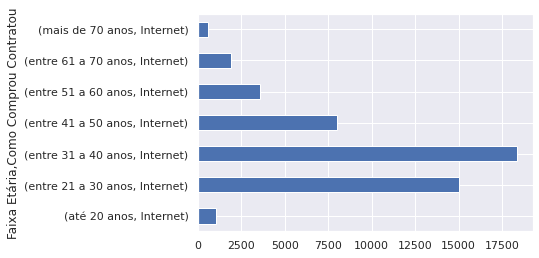

In [ ]:

df2 = dataset[dataset['Como Comprou Contratou']=='Internet']
df2.groupby(u'Faixa Etária')['Como Comprou Contratou'].value_counts().plot.barh()

# Estes consumidores procuram a empresa antes de registrar uma reclamação?

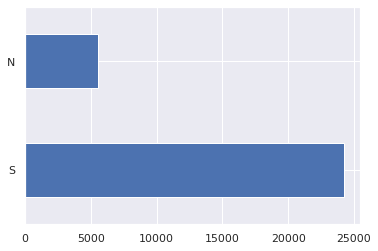

In [ ]:
df2 = dataset[dataset[u'Faixa Etária']=='entre 21 a 30 anos']
df2['Procurou Empresa'].value_counts().plot.barh()

# Qual o grupo de problema mais comum ?

In [ ]:
dataset['Grupo Problema'].value_counts()

Cobrança / Contestação    52789
Contrato / Oferta         24559
Atendimento / SAC         18441
Vício de Qualidade        16301
Informação                 8099
Entrega do Produto         5126
Saúde e Segurança           807
Name: Grupo Problema, dtype: int64

In [ ]:
#Podemos ir mais a fundo e investigar quais são os problemas que estão relacionados a esse grupo.
dataset[dataset['Grupo Problema'] == u'Cobrança / Contestação'][u'Problema'].value_counts()

Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                            10748
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores                       9503
Cobrança indevida / abusiva para alterar ou cancelar o contrato                                            8865
Cobrança de tarifas, taxas, valores não previstos / não informados                                         4175
Cobrança após cancelamento do serviço                                                                      2317
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                       2221
Renegociação / parcelamento de dívida                                                                      1779
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                          1548
Negativação indevida (SPC, Serasa, SCPC etc)                                                            

# Qual a quantidade de reclamações por segmento de mercado?

In [ ]:
dataset['Segmento de Mercado'].value_counts()

Bancos, Financeiras e Administradoras de Cartão                            38802
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    28582
Comércio Eletrônico                                                         8547
Transporte Aéreo                                                            6609
Bancos de Dados e Cadastros de Consumidores                                 6268
Empresas de Pagamento Eletrônico                                            6165
Energia Elétrica                                                            4188
Viagens, Turismo e Hospedagem                                               3982
Empresas de Intermediação de Serviços / Negócios                            3827
Seguros, Capitalização e Previdência                                        3444
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       2914
Empresas de Serviços Postais e Logística                                    1326
Varejo                      

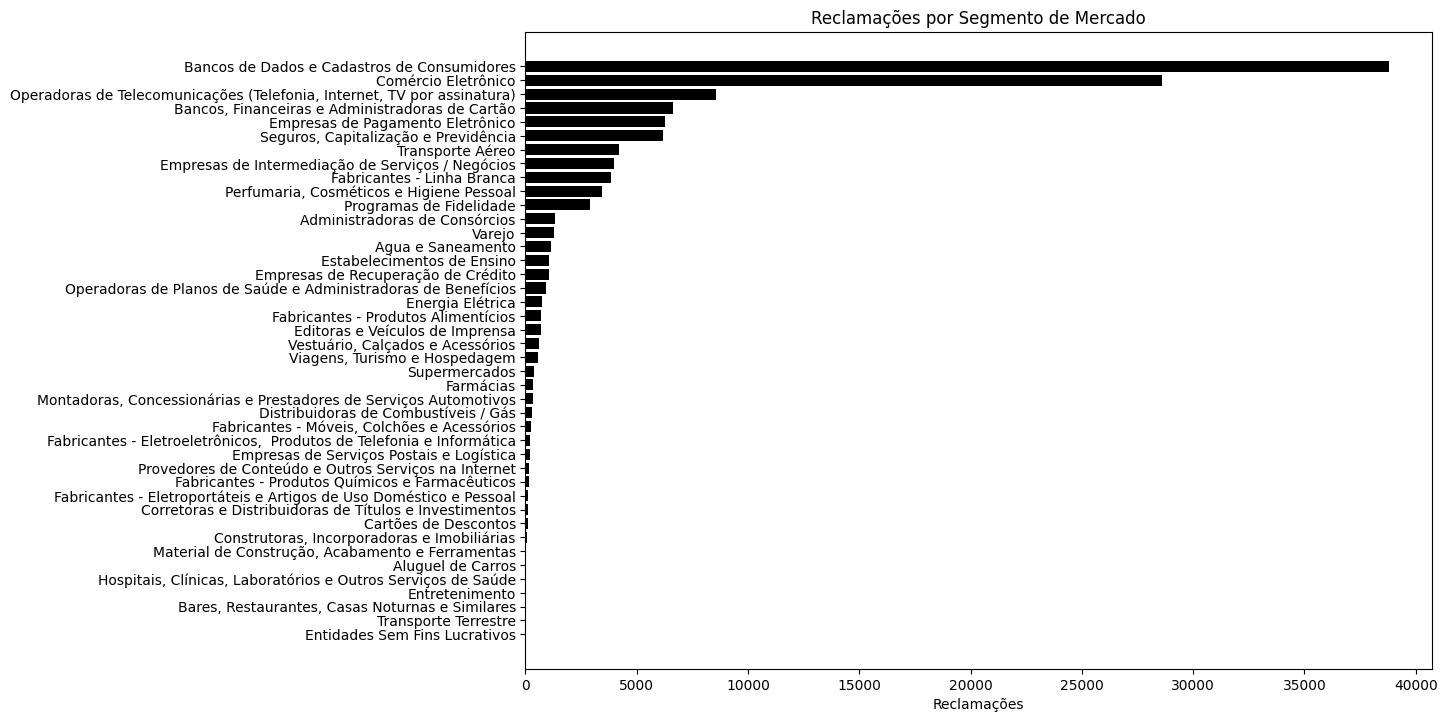

In [ ]:
plt.style.use('ggplot')
plt.rcdefaults()

#aumentando as dimensões do grafico
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

y_pos = np.arange(len(dataset['Segmento de Mercado'].value_counts()))
values = dataset['Segmento de Mercado'].value_counts()
segmentos = dataset['Segmento de Mercado'].unique()

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Reclamações por Segmento de Mercado')

plt.show()

# Top 20 das empresas com mais reclamações

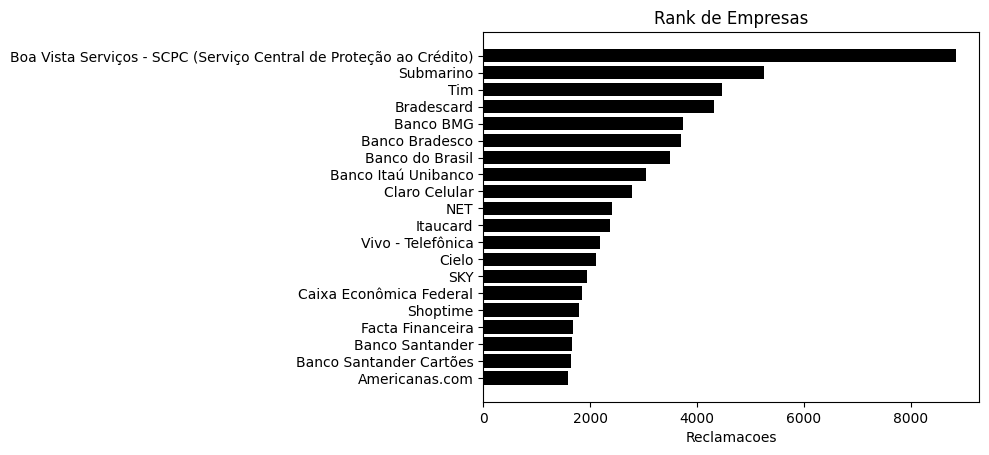

In [ ]:
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset['Nome Fantasia'].value_counts()[:20]))
values = dataset['Nome Fantasia'].value_counts()[:20]
segmentos = dataset['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')

plt.show()

# Avaliando as notas dos consumidores

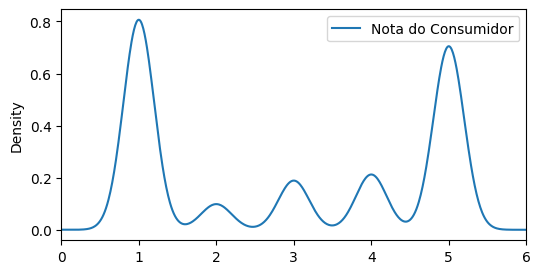

In [ ]:
dataset.plot.density(y='Nota do Consumidor',xlim=[0,6],figsize=[6,3])

# Quantos dias a empresa leva para responder o cliente?

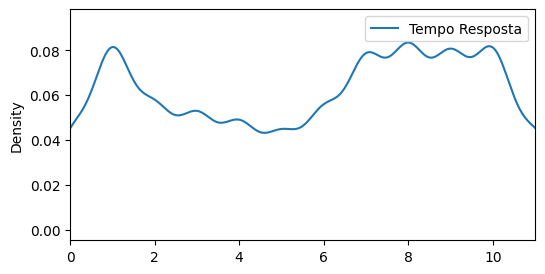

In [ ]:
dataset.plot.density(y='Tempo Resposta',xlim=[0,11],figsize=[6,3])

# Análise de Reclamações por região

In [ ]:
municipios = pd.read_excel('./base/municipiosBrasil.xls')

# Tratamento dos dados:
import unicodedata
import re
def remover_acentos(txt):
    nfkd = unicodedata.normalize('NFKD', txt)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    palavraSemAcento = re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)
    palavraSemAcento = str(palavraSemAcento).upper()
    return palavraSemAcento

dataset['Cidade2'] = dataset['Cidade'].apply(remover_acentos)


In [ ]:
import folium 

# Especificando a localização, o valor de zoom e o tipo do mapa:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Toner')
coordenadas=[]
# Limitando o número de registros para não travar a máquina:
for cid,uf in zip(dataset.Cidade2[:20000],dataset.UF[:20000]):
    cidadeUf = cid+' - '+uf
# Pegando os valores de longitude e latitude das duas bases:
    lat = municipios[municipios['Mun/UF'] == cidadeUf]['LATITUDE'].values
    long = municipios[municipios['Mun/UF'] == cidadeUf]['LONGITUDE'].values
    if lat != '' and long != '':
# Tratando os valores de lat e log:
        lat = float(str(lat).replace('[','').replace(']','').replace(' ',','))
        long = float(str(long).replace('[','').replace(']','').replace(' ',','))
        coordenadas.append([lat,long])
     
# Alimentando o mapa com as coordenadas fornecidas pelo código anterior:
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':


# Dentro das instituições financeiras quais são os serviços que possuem o maior número de reclamações?

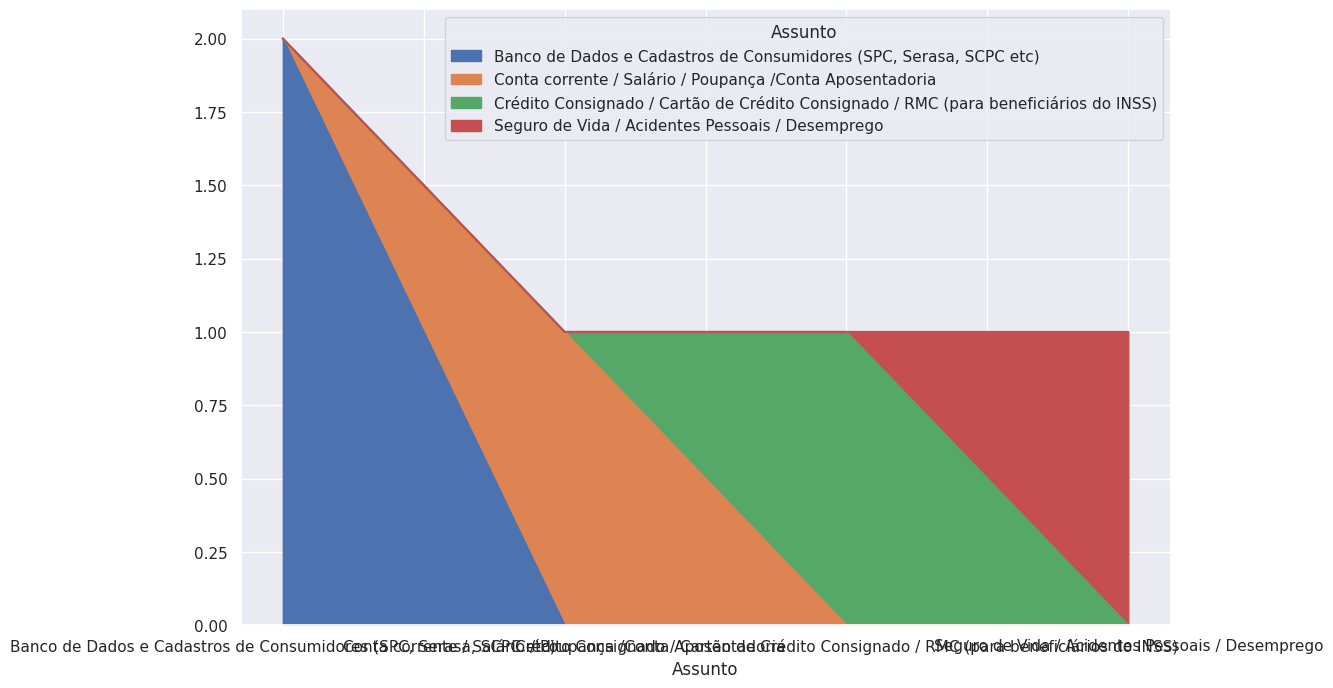

In [ ]:
# Filtrando por segmento de mercado:
df = dataset[dataset['Segmento de Mercado']==u'Bancos, Financeiras e Administradoras de Cartão'][:5]
df = df[df[u'Área']==u'Serviços Financeiros'][:5]

# Gráfico:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('Assunto')['Assunto'].value_counts().unstack().plot.area(ax=ax)